In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import lambertw
from numpy import exp, log, e
%matplotlib inline

In [2]:
def lambertDecay(t, alpha, tau, sigma_12, sigma_21, n, n20):
    
    B = 1 + alpha*sigma_12*n
    A = (alpha*(sigma_12+sigma_21)) / B

    arg = -A*n20*exp(-(t/(B*tau))-(A*n20))

    # Check that result is real
    assert min(arg) >= -1/e, \
    'Lambert W Argument will give an imaginary result.'

    return -lambertw(arg).real/A

In [4]:
t = np.linspace(0,30,1000)

tau = 10
sigma_12 = 1
sigma_21 = 1
n = 1
n20 = 0.9
alpha = 1

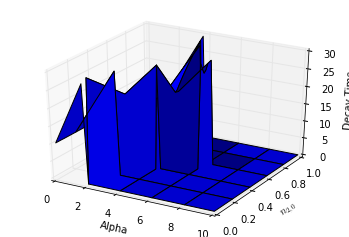

In [24]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.linspace(0.01, 10, 50)
y = np.linspace(0.01, 1, 50)
X, Y = np.meshgrid(x, y)

def decayTime(t, alpha, tau, sigma_12, sigma_21, n, n20):
    data = lambertDecay(t, alpha, tau, sigma_12, sigma_21, n, n20)
    data = data/max(data)
    ind = np.where(data <  1/e)

    try:
        ind = ind[0][0]
        decay = t[ind]
    except:
        decay = 0
    
    return decay

zs = np.array([decayTime(t, alpha, tau, sigma_12, sigma_21, n, n20) for alpha,n20 in zip(np.ravel(X), np.ravel(Y))])

Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('Alpha')
ax.set_ylabel('$n_{2,0}$')
ax.set_zlabel('Decay Time')

plt.show()

In [25]:
plt.contourf?

In [ ]:
# %load fittingLambertW.py
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import lambertw
from numpy import exp, log, e

def minimize():
    """

    http://stackoverflow.com/questions/16760788/python-curve-\
    fit-library-that-allows-me-to-assign-bounds-to-parameters

    Theoretical fit of the population regime lambertW decay 
    using either scipy's minimize routine.

    Data is first created using p0 and then noise is added before
    the fit is performed.

    """

    import warnings
    warnings.filterwarnings('ignore')
    from scipy.optimize import minimize

    def model_func(t, *p):
        
        def lambertDecay(t, *p):
            sigma_21 = 1
            tau = 10
    #         n20 = 0.8
            alpha, n20 = p
            arg = -alpha*sigma_21*n20*exp(-(t+alpha*sigma_21*n20*tau)/tau)
            return -lambertw(arg)/(alpha*sigma_21)

        n = lambertDecay(t, *p)
        
        return n.real

    # generate noisy data with known coefficients
    alpha = 0.3
    n20 = 0.8 

    p0 = [alpha, n20]  # Guess for dependent data
    t = np.linspace(0,30,1000)
    n = model_func(t,*p0)
    data = n + np.random.normal(0, 0.02, np.size(n))

    ## mean squared error wrt. noisy data as a function of the parameters
    # err = lambda p: np.mean((model_func(t,*p)-data)**2)

    # Sum-Squared-Error Cost Function wrt. noisy data as a function of the parameters
    err = lambda p: np.sum((data-model_func(t,*p))**2)

    # bounded optimization using scipy.minimize
    p_init = p0
    popt = minimize(
        err, # minimize wrt to the noisy data
        p_init, 
        bounds=[(0,None),(0.5,1)], # set the bounds
        method="L-BFGS-B" # this method supports bounds
    ).x

    # plot everything
    plt.figure()
    plt.scatter(t, data, alpha=.2, label='f + noise')
    plt.plot(t, n, 'k-', label='f')
    plt.plot(t, model_func(t, *popt), 'r--', lw=2, label="Fitted Curve")

    plt.axhline(1/np.e, ls='--', color='k')
    plt.legend(loc='best', title='alpha')
    plt.ylabel('$n_2$/max($n_2$)')
    plt.xlabel('time (ms)')
    plt.xlim(min(t),max(t))
    plt.yscale('log')
    plt.show()

    print(p0, popt)
    
    
if __name__ == "__main__":
    # curveFit()
    minimize()

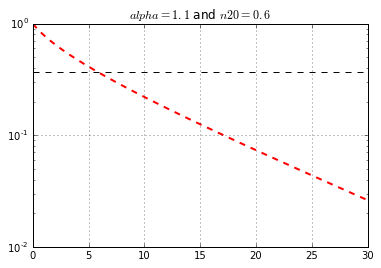

In [4]:
from ipywidgets import interact

def plt_arrays(x, y, title="", color="red", linestyle="dashed", linewidth=2):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(x,y, color=color, linestyle=linestyle, linewidth=linewidth)
    axes.set_title(title)
    axes.grid()
    plt.axhline(1/np.e, ls='--', color='k')
    plt.xlim(0,30)
    plt.yscale('log')
    plt.show()
    
def f(alpha, n20, **kwargs):
    t = np.linspace(0,30,500)
    tau = 10
    sigma_21 = 1
    n = lambertDecay(t, alpha, tau, sigma_21, n20)
    
    title="$alpha = %s$ and $n20 = %s$" % (alpha,n20)
    
    plt_arrays(t,n/max(n), title=title, **kwargs)
    
#Define Constants
alpha=0.25
n20=0.7

f(alpha, n20)

i = interact(f,
             alpha=(0.1,10.),
             n20=(0.5,1),
#              color = ["red", "blue", "green"],
#              linestyle=["solid", "dashed"],
#              linewidth=(1,5)
             )